Install fastai

In [36]:
!pip install -Uqq fastbook
from fastai.vision.all import *
from IPython.display import Image 

Downlaod data set

In [37]:
path = untar_data(URLs.PETS)/'images'
path

Path('/root/.fastai/data/oxford-iiit-pet/images')

Check images

In [38]:
path.ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_105.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_79.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_117.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_185.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_44.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_130.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_69.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_23.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_71.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_13.jpg')...]

In [39]:
len(path.ls())

7393

Thats a lot of files...

In [40]:
from random import sample

In [41]:
short_list = sample(path.ls(),500)
len(short_list)

500

Show a test image

/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_238.jpg


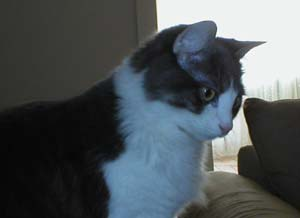

In [42]:
img_number = 4
print(short_list[img_number])
Image(str(short_list[img_number]))

Define func to label images

In [43]:
def is_cat(x): return x[0].isupper()

Load data

In [44]:
dls = ImageDataLoaders.from_name_func(
    path, short_list, valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

Train model

In [45]:
slearn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.835748,0.377926,0.160000,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.300184,0.143132,0.040000,00:05
1,0.182454,0.066628,0.040000,00:05
2,0.130937,0.054749,0.020000,00:05


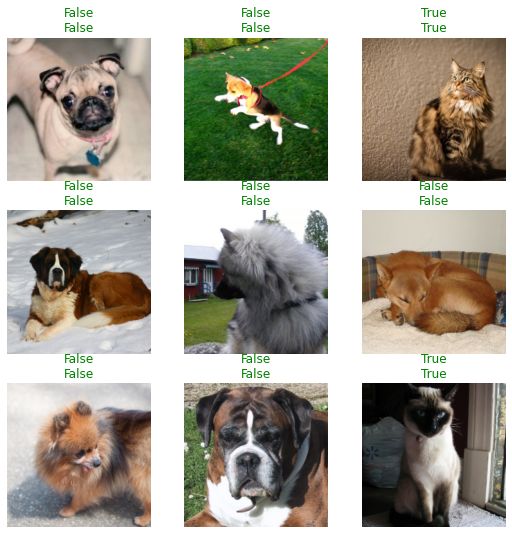

In [50]:
learn.show_results()

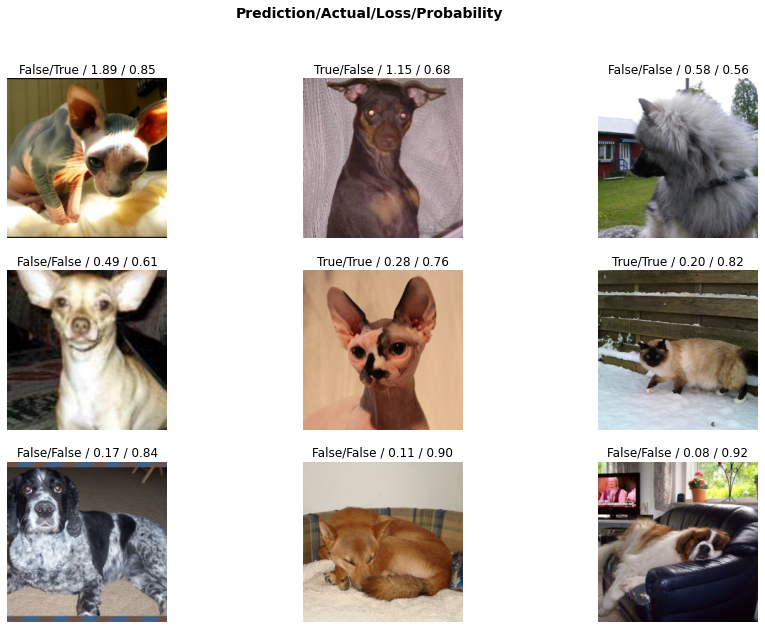

In [51]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

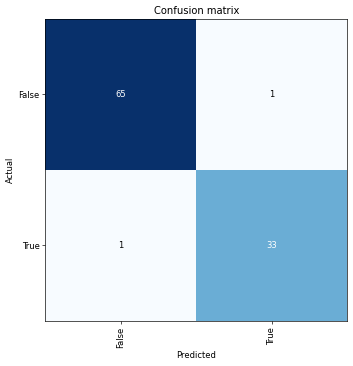

In [52]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [46]:
test_img_url = 'https://i.guim.co.uk/img/media/26392d05302e02f7bf4eb143bb84c8097d09144b/446_167_3683_2210/master/3683.jpg?width=1200&height=1200&quality=85&auto=format&fit=crop&s=49ed3252c0b2ffb49cf8b508892e452d'

In [47]:
file_name = os.path.basename(test_img_url)
file_name

'3683.jpg?width=1200&height=1200&quality=85&auto=format&fit=crop&s=49ed3252c0b2ffb49cf8b508892e452d'

In [48]:
import requests

img_data = requests.get(test_img_url).content
with open(file_name, 'wb') as handler:
    handler.write(img_data)

In [49]:
learn.predict(file_name)

('True', tensor(1), tensor([7.5218e-13, 1.0000e+00]))